<div style="text-align:center">
  <h1>Spatial Economics</h1>
  <h1>Assignment 1</h1>
  <h3>Nicolas (adjust)</h3>
  <h3>703308</h3>
  <h3>TI</h3>
</div>

This file gives explanations to the results additional to the code for replicability.

<div style="text-align:center">
  <h4>Introduction</h4>
</div>

Small intro regarding project

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

<div style="text-align:center">
  <h4>Exercise 1</h4>
</div>
Solve the model for the parametrization of the model that is assigned to your group. Describe
the equilibrium or equilibria graphically as well as in words, paying explicit attention to the
stability of the equilibria. Consider the effect of varying transport costs by constructing and
describing a graph similar to Figure 4.2 in the book (the so-called wiggle diagram). Describe
the comparative statics characteristics of the model with respect to transport costs in your own
words. Make sure that you vary the transport costs in such a way that all interesting type of
equilibria are found and can be described. 

In [21]:
def solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam,T):
    def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return(Y1-phi1*(1-gam)*L-lam*gam*L*W1,
                Y2-(1-phi1)*(1-gam)*L-(1-lam)*gam*L*W2,
                W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
                W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
                I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
                I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))

    Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1),xtol=1e-10)
    Rel = (W1/I1**delta)/(W2/I2**delta)
    Welf = Y1/(I1**delta)+Y2/(I2**delta)
    Man_H=W1/I1**delta
    Man_F=W2/I2**delta
    Farm_H=1/I1**delta
    Farm_F=1/I2**delta
    return Rel, Welf, Man_H, Man_F, Farm_H, Farm_F

def run_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, T):
    print ("T is equal to", T)
    VRelative = np.zeros(len(lam_values))
    VWelfare = np.zeros(len(lam_values))
    VW_Man_H = np.zeros(len(lam_values))
    VW_Man_F = np.zeros(len(lam_values))
    VW_Farm_H = np.zeros(len(lam_values))
    VW_FRamF = np.zeros(len(lam_values))

    for lamh in range (len(lam_values)):
        #given specific lambda value the values are calculated and stored
        VRelative[lamh], VWelfare[lamh], VW_Man_H[lamh], VW_Man_F[lamh], VW_Farm_H[lamh], VW_FRamF[lamh] = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)
        Rel, Welf, Man_H, Man_F, Farm_H, Farm_F = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)

    return VWelfare, VRelative, VW_Man_H, VW_Man_F, VW_Farm_H, VW_FRamF

def CP_model(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L, lines, color):
    fig = plt.figure()
    n_T = len(Th_values)
    n_lambda = len(lam_values)

    Relative_matrix = np.zeros((n_T, n_lambda))
    Welfare_matrix = np.zeros((n_T, n_lambda))
    W_Man_H_matrix = np.zeros((n_T, n_lambda))
    W_Man_F_matrix = np.zeros((n_T, n_lambda))
    W_Farm_H_matrix = np.zeros((n_T, n_lambda))
    W_Farm_F_matrix = np.zeros((n_T, n_lambda))

    for Th in range (len(Th_values)):
        Welfare_matrix[Th, :], Relative_matrix[Th, :], W_Man_H_matrix[Th, :], W_Man_F_matrix[Th, :], W_Farm_H_matrix[Th, :], W_Farm_F_matrix[Th, :] = run_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, Th_values[Th])

    return Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix
    

In [22]:
def plot_selected_T(lam_values, T_values, relative_matrix, selected_T_indices):
    plt.figure(figsize=(8, 6))
    
    colors = ['black', 'blue', 'red', 'green', 'orange']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    
    for plot_idx, T_idx in enumerate(selected_T_indices):
        plt.plot(lam_values, relative_matrix[T_idx, :],
                 label=f'T = {T_values[T_idx]}',
                 color=colors[plot_idx],
                 linestyle=linestyles[plot_idx])
    
    plt.axhline(1, color='grey', linestyle='--', linewidth=0.8)
    plt.xlabel('λ (lambda)')
    plt.ylabel('Relative Real Wage (W1/I1^δ) / (W2/I2^δ)')
    plt.title('Wiggle Diagram (Selected T Values)')
    plt.legend(title='Transport cost T')
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()


T is equal to 1.3
T is equal to 1.31
T is equal to 1.32
T is equal to 1.33
T is equal to 1.34
T is equal to 1.35
T is equal to 1.36
T is equal to 1.37
T is equal to 1.38
T is equal to 1.39
T is equal to 1.4
T is equal to 1.41
T is equal to 1.42
T is equal to 1.43
T is equal to 1.44
T is equal to 1.45
T is equal to 1.46
T is equal to 1.47
T is equal to 1.48
T is equal to 1.49
T is equal to 1.5
T is equal to 1.51
T is equal to 1.52
T is equal to 1.53
T is equal to 1.54
T is equal to 1.55
T is equal to 1.56
T is equal to 1.57
T is equal to 1.58
T is equal to 1.59
T is equal to 1.6
T is equal to 1.61
T is equal to 1.62
T is equal to 1.63
T is equal to 1.64
T is equal to 1.65
T is equal to 1.66
T is equal to 1.67
T is equal to 1.68
T is equal to 1.69
T is equal to 1.7
T is equal to 1.71
T is equal to 1.72
T is equal to 1.73
T is equal to 1.74
T is equal to 1.75
T is equal to 1.76
T is equal to 1.77
T is equal to 1.78
T is equal to 1.79
T is equal to 1.8
T is equal to 1.81
T is equal to 1.82

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

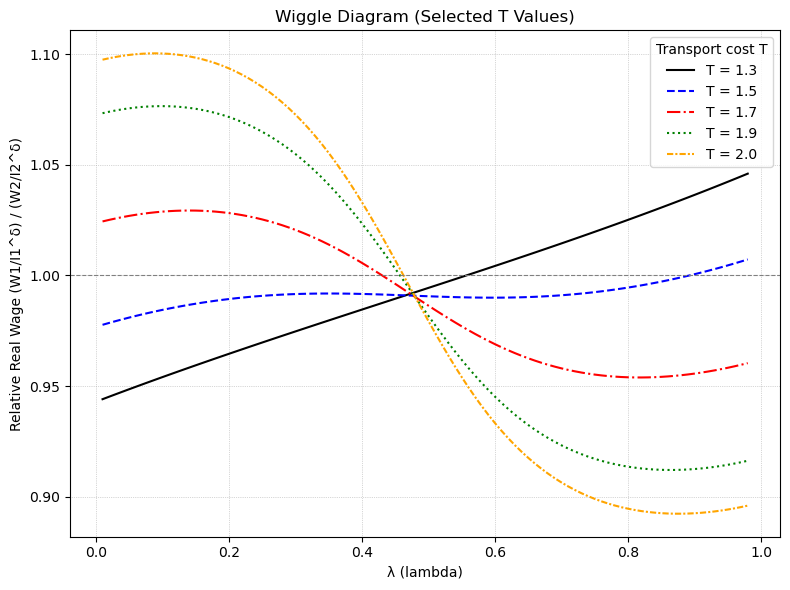

In [23]:
#Group 2: Τ = 1.9. 

phi1=0.48
# phi2=0.6
gam=0.3
L=2.0
eps=5.0
rho=0.75        #changed for gr2
bet=0.8
alp=0.08
delta=0.35      #changed for gr2
T_lambda = []
T_T = []
T_Stab=[]
fig = plt.figure()
lines = ["-","--","-.",":","+","."]
color = ["Black","Green","Red","Yellow","Purple","Grey"]
colstab = ["Red","Black"]
file = open("Results.txt","w")

# Define number of iterations T and lambda
Th_min=130
Th_max=201 
Th_step=1
Th_div=100

lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100

Th_values = np.arange(Th_min, Th_max, Th_step) / Th_div
lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = CP_model(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L, lines, color)

selected_T_values = [1.3, 1.5, 1.7, 1.9, 2.1]
selected_T_indices = [np.argmin(np.abs(Th_values - T_sel)) for T_sel in selected_T_values]

plot_selected_T(lam_values, Th_values, Relative_matrix, selected_T_indices)



<div style="text-align:center">
  <h4>Exercise 2 The role of farmers</h4>
</div>
Farmers play an important role in the core-periphery model although their role oftentimes
remains somewhat underexposed in the discussion of the model. In this exercise, you will study
in some more detail the role of farmers in the core-periphery model.

a. All results derived in the book by Brakman et al. are based on the assumption that
agricultural workers are evenly distributed over the two regions ($\phi_1=\phi_2=0.5$). Solve
the model under the alternative assumption that $\phi_1$ = 0.55 (and thus $\phi_2$ = 0.45).
Describe the resulting equilibrium/equilibria. Explain the effect of introducing asymmetry
in the allocation of farmers on the equilibrium outcome of the model in words. Provide
the economic intuition.

b. Characteristic for the development of modern economies over time is the shrinking of the
agricultural sector. Explain which parameter you need to vary to capture the shrinking of
the agricultural sector. Take the benchmark parametrization for your group and show the
effect of a shrinking share of farmers on the equilibrium outcome of the model (including
a description of the impact on welfare). Describe the effects in words and provide the
economic intuition. 